In [121]:
import pandas as pd


In [122]:
dataframe = pd.read_csv("../data/84_amb2_2.1.csv", delimiter=";", skiprows=45, parse_dates=['Timestamp'])
dataframe

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13928\3428632325.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe = pd.read_csv("../data/84_amb2_2.1.csv", delimiter=";", skiprows=45, parse_dates=['Timestamp'])


,id,Timestamp,Source Value,Reading
0,id,(seconds),(Volts),(Amps)
1,1,0.0,-0.7,-1.574755E-5
2,2,0.499888,-0.6858586,-1.404285E-5
3,3,0.999888,-0.6717172,-1.379252E-5
4,4,1.499888,-0.6575758,-1.322031E-5
...,...,...,...,...
96,96,47.49989,0.6434343,1.401901E-5
97,97,47.99989,0.6575758,1.437664E-5
98,98,48.49989,0.6717172,1.538992E-5
99,99,48.99989,0.6858586,1.517534E-5


In [123]:
dataframe.index[0]

0

In [124]:
dataframe = dataframe.drop(dataframe.index[0])
dataframe

,id,Timestamp,Source Value,Reading
1,1,0.0,-0.7,-1.574755E-5
2,2,0.499888,-0.6858586,-1.404285E-5
3,3,0.999888,-0.6717172,-1.379252E-5
4,4,1.499888,-0.6575758,-1.322031E-5
5,5,1.999888,-0.6434343,-1.263618E-5
...,...,...,...,...
96,96,47.49989,0.6434343,1.401901E-5
97,97,47.99989,0.6575758,1.437664E-5
98,98,48.49989,0.6717172,1.538992E-5
99,99,48.99989,0.6858586,1.517534E-5


In [ ]:
dataframe.drop(columns=['id'], inplace=False)
dataframe

,id,Timestamp,Source Value,Reading
1,1,0.0,-0.7,-1.574755E-5
2,2,0.499888,-0.6858586,-1.404285E-5
3,3,0.999888,-0.6717172,-1.379252E-5
4,4,1.499888,-0.6575758,-1.322031E-5
5,5,1.999888,-0.6434343,-1.263618E-5
...,...,...,...,...
96,96,47.49989,0.6434343,1.401901E-5
97,97,47.99989,0.6575758,1.437664E-5
98,98,48.49989,0.6717172,1.538992E-5
99,99,48.99989,0.6858586,1.517534E-5


In [126]:
dataframe.columns

Index(['id', 'Timestamp', 'Source Value', 'Reading'], dtype='object')

In [127]:
dataframe.describe()

,id,Timestamp,Source Value,Reading
count,100,100,100,100
unique,100,100,100,98
top,1,0.0,-0.7,-1.13368E-5
freq,1,1,1,2


In [128]:
dataframe.shape

(100, 4)

In [129]:
dataframe.size

400

In [130]:
# changer le nom de la colonne du temps
dataframe = dataframe.set_index('Timestamp')

In [131]:
# Mettre les ligne en ordre en fonction de l'index aui est le temps
dataframe = dataframe.sort_index()

In [132]:
# Debut du document
dataframe.head()

,id,Source Value,Reading
Timestamp,,,
0.0,1,-0.7,-1.574755E-5
0.499888,2,-0.6858586,-1.404285E-5
0.999888,3,-0.6717172,-1.379252E-5
1.499888,4,-0.6575758,-1.322031E-5
1.999888,5,-0.6434343,-1.263618E-5


In [133]:
# info su r les donnees
print("DataFrame Info:")
dataframe.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0.0 to 9.999889
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   Source Value  100 non-null    object
 2   Reading       100 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [134]:
# Regardond levolution du temps
print(f"Debut: {dataframe.index.min()}")
print(f"Fin: {dataframe.index.max()}")

Debut: 0.0
Fin: 9.999889


KeyError: 'Direct consumption [kW]'

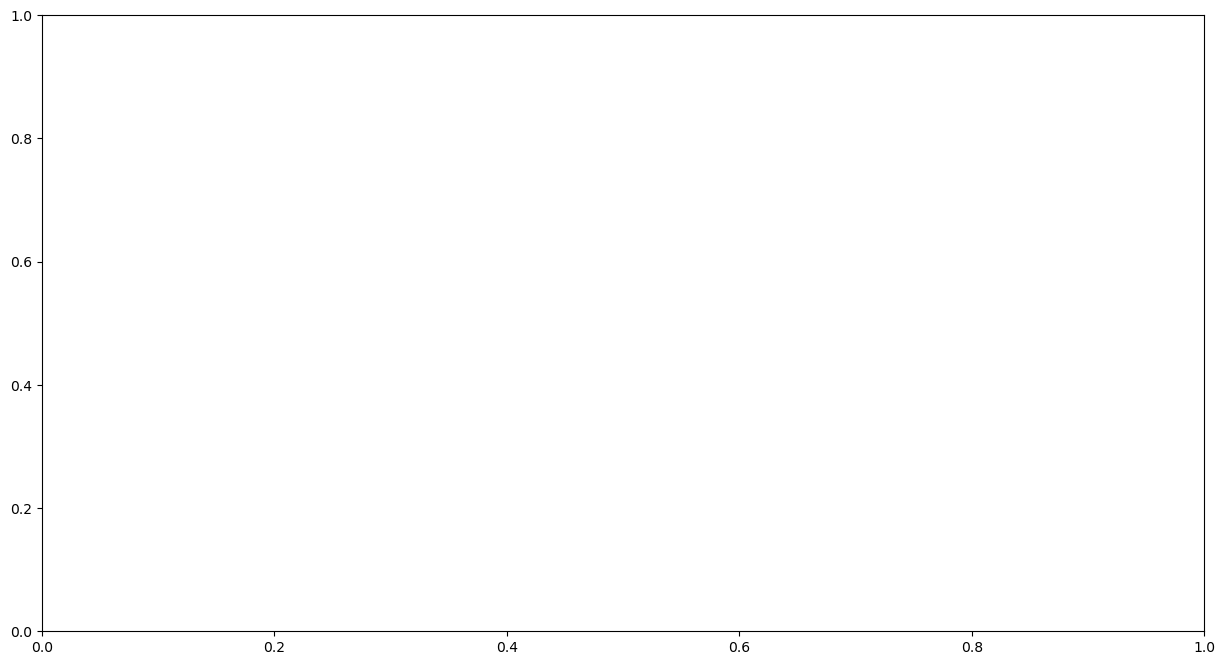

In [135]:
import matplotlib.pyplot as plt

# Créer une figure
fig, ax = plt.subplots(figsize=(15, 8))

# Tracer les données avec des couleurs différentes
ax.plot(dataframe.index, dataframe['Direct consumption [kW]'], 'b-', 
        label='Direct consumption', linewidth=1)
ax.plot(dataframe.index, dataframe['Grid-supplied power [kW]'], 'g-', 
        label='Grid-supplied power', linewidth=1)
ax.plot(dataframe.index, dataframe['Grid feed-in [kW]'], 'r-', 
        label='Grid feed-in', linewidth=1)
ax.plot(dataframe.index, dataframe['Total consumption [kW]'], 'y-', 
        label='Total consumption', linewidth=1)
ax.plot(dataframe.index, dataframe['Total generation [kW]'], 'm-', 
        label='Total generation', linewidth=1)

# Configurer les axes et les labels
ax.set_xlabel('Time')
ax.set_ylabel('Power [kW]')

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajouter la légende
ax.legend(loc='upper right')

# Titre du graphique
plt.title('Power Metrics Over Time')

# Ajuster la mise en page
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()